In [1]:
import pickle

import argparse
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import keyboard

import brainflow
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations

In [ ]:
sf = 256 # sampling rate
eeg_channels = BoardShim.get_eeg_channels(BoardIds.CYTON_BOARD.value) # 0  

# 1-1. Get Data from Cyton Board

* (For cyton board) specify below
    * board_id : 0
    * serial_port field of BrainFlowInputParams structure

* Cyton board spec
    * 8 eeg channels
    * 3 acceleration channels
    * sampling rate : 250
    * communication : serial port
    * signal gain : 24


In [10]:
data_list = [] # append eeg data for every n_seconds
n_sec = 5

def main ():
    params = BrainFlowInputParams()
    params.serial_port = 'COM8' #args.serial_port

    BoardShim.enable_dev_board_logger()

    board = BoardShim(0, params)
    board.prepare_session()
    board.start_stream() #default options
    
    while True:
        if keyboard.is_pressed('q'):
            break
        time.sleep(n_sec)
        data = board.get_board_data() # get all data and remove it from internal buffer
        data_list.append(data)
        print("추가 했어요..")
    board.stop_stream()
    board.release_session()

if __name__ == "__main__":
    main()

추가 했어요..
추가 했어요..
추가 했어요..
추가 했어요..
추가 했어요..
추가 했어요..
추가 했어요..
추가 했어요..
추가 했어요..
추가 했어요..
추가 했어요..
추가 했어요..
추가 했어요..
추가 했어요..
추가 했어요..
추가 했어요..


KeyboardInterrupt: 

In [37]:
print(len(data_list))
print(len(data_list[0][0])/250)

signal_list = []
for data in data_list:
    signal = data[eeg_channels, :]
    signal_list.append(signal)

16
4.812


### * Save & Load 

In [27]:
# save
# with open('test_eeg.pickle', 'wb') as f:
#     pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

# load 
with open('test_eeg.pickle', 'rb') as f:
    data = pickle.load(f)
    # print(type(data)) # ndarray
    # print(data.shape) # (23, 2364)
    signal = data[eeg_channels, :]
    print(signal.shape)

(8, 2364)


# 2. plot original data

(8, 28928)


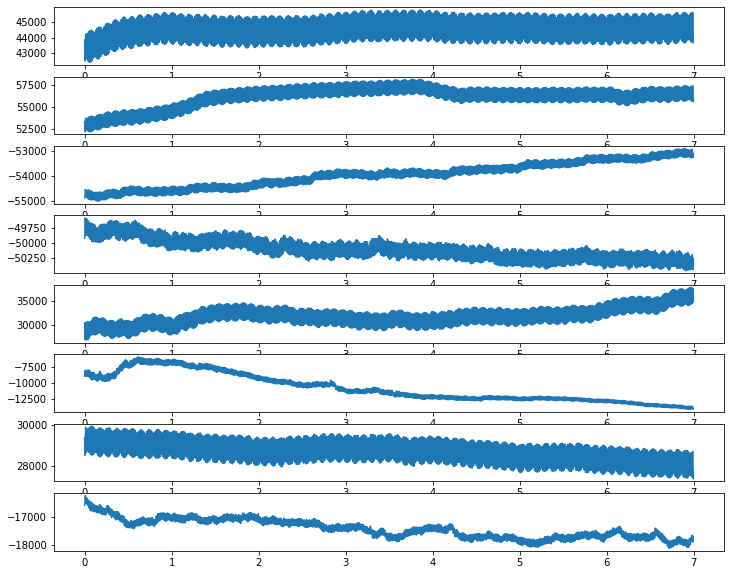

In [114]:
test_signal = signal_list[0]
print(test_signal.shape)

# range to plot
st = sf # 초반 1초 제거
en = sf*8
time = np.arange(len(test_signal[0, st:en]))/sf

plt.figure(figsize=(12,10))

eeg_channels = BoardShim.get_eeg_channels(BoardIds.CYTON_BOARD.value) # 0  
for ch in eeg_channels:
    plt.subplot(810+ch)
    plt.plot(time, test_signal[ch-1, st:en])